/var/folders/c6/lk2vry3x45g5p7938w1jd1h00000gn/T/ipykernel_83366/2983235143.py:24: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/var/folders/c6/lk2vry3x45g5p7938w1jd1h00000gn/T/ipykernel_83366/2983235143.py:24: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/var/folders/c6/lk2vry3x45g5p7938w1jd1h00000gn/T/ipykernel_83366/2983235143.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


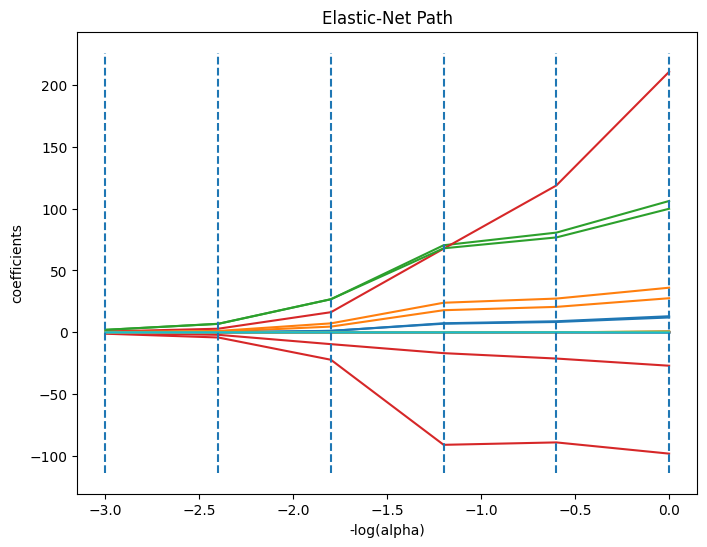

In [16]:
# дейлай еластикнет регуляризацию для логрега, +2 параметра в конструктор на л1 и л2 части

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class ElasticNet:
    def __init__(self, l1=0.1, l2=0.1, max_iter=1000, alpha=0.01):
        self.l1 = l1
        self.l2 = l2
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.b = None
        self.loss = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss_func(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.max_iter):
            y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + self.l2 * self.w + self.l1 * np.sign(self.w)
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.w -= self.alpha * dw
            self.b -= self.alpha * db
            self.loss.append(self.loss_func(y, y_pred))
    
    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.w) + self.b)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls



# Lasso and Elastic-Net Paths: left - coefficients, bottom - log(alpha)

def plot_path(X, y, l1_ratio=0.5, alphas=np.logspace(-3, 0, 6)):
    coefs_ = []
    for a in alphas:
        clf = ElasticNet(l1_ratio, max_iter=1000, alpha=a)
        clf.fit(X, y)
        coefs_.append(clf.w)
    coefs_ = np.array(coefs_)
    plt.figure(figsize=(8, 6))
    plt.plot(np.log10(alphas), coefs_)
    ymin, ymax = plt.ylim()
    plt.vlines(np.log10(alphas), ymin, ymax, linestyles='dashed')
    plt.xlabel('-log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Elastic-Net Path')
    plt.axis('tight')
    plt.show()

X, y = datasets.load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plot_path(X_train, y_train, l1_ratio=0.5)